# Construccion de Carteras Optimas

## 3 Estrategias de Inversion

In [34]:
import sys
sys.path.insert(0, '../codigo')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from construccion_carteras import CarteraOptimaMercado, CarteraAgresivaTech, CarteraGrowthMomentum
from analisis_numero_optimo import AnalisisNumeroOptimo
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print('[OK] Librerias importadas')

[OK] Librerias importadas


In [35]:
datos_retornos = pd.read_excel('../../data/prod_long_sharpe_u60_20260125_v1_train_dataset.csv', sheet_name='Sheet1')
datos_retornos.columns = [f'Activo_{i}' for i in range(1, 61)]

betas_df = pd.read_csv('../betas_resultados.csv')

caracteristicas_df = pd.read_excel('../../data/prod_long_sharpe_u60_20260125_v1_train_dataset.csv', sheet_name='Hoja2')

print(f'[OK] Datos cargados: {datos_retornos.shape}')

[OK] Datos cargados: (1758, 60)


In [36]:
analizador = AnalisisNumeroOptimo(datos_retornos)
df_frontera = analizador.simular_frontera_diversificacion(
    n_valores=[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 60],
    n_simulaciones=100
)

n_optimo = analizador.detectar_n_optimo(umbral_reduccion=2.0)
print(f'[OK] N optimo detectado: {n_optimo}')


[OK] Análisis de número óptimo inicializado
  Activos disponibles: 60
  Observaciones: 1758

SIMULACIÓN: FRONTERA DE DIVERSIFICACIÓN
Valores de N a probar: [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 40, 50, 60]
Simulaciones por N: 100
Total de simulaciones: 1700
--------------------------------------------------------------------------------

Procesando N=2...

Procesando N=3...

Procesando N=4...

Procesando N=5...

Procesando N=6...

Procesando N=7...

Procesando N=8...

Procesando N=9...

Procesando N=10...

Procesando N=12...

Procesando N=15...

Procesando N=20...

Procesando N=25...

Procesando N=30...

Procesando N=40...

Procesando N=50...

Procesando N=60...

TABLA RESUMEN: FRONTERA DE DIVERSIFICACIÓN
  N |  Vol(%) |   ±Std |  Esp(%) |  Sis(%) |  Reduc
--------------------------------------------------------------------------------
  2 |    1.53 |   0.30 |   91.11 |   43.37 |    nan%
  3 |    1.38 |   0.22 |   82.35 |   55.44 |   9.66%
  4 |    1.36 |   0.21 |   72.72 |

## Cartera 1: Optima de Mercado

In [46]:
cartera1 = CarteraOptimaMercado(datos_retornos, betas_df, caracteristicas_df)
activos_optimos = cartera1.seleccionar_activos()

print(f'[OK] Activos seleccionados para cartera optima:')
print(activos_optimos[['Activo', 'Sharpe', 'Volatilidad_Anualizada', 'Beta', 'Sector']].to_string(index=False))

[OK] Activos seleccionados para cartera optima:
 Activo   Sharpe  Volatilidad_Anualizada      Beta                         Sector
     51 1.411636                0.193692  0.371391 Residential & Commercial REITs
     56 1.322656                0.183033  0.305494 Residential & Commercial REITs
     47 1.185120                0.174693  0.318452 Residential & Commercial REITs
     41 1.096431                0.191392  0.404310 Residential & Commercial REITs
     50 0.865891                0.217200  0.289355      Electric Utilities & IPPs
     43 0.891304                0.281545  0.494638                      Oil & Gas
     18 0.650442                0.238675  0.395541      Electric Utilities & IPPs
     39 0.240032                0.403170 -0.066838                Metals & Mining


In [47]:
pesos_cartera1 = cartera1.optimizar_pesos()

activos_con_peso = [(i+1, pesos_cartera1[i]) for i in range(60) if pesos_cartera1[i] > 0.001]
activos_con_peso.sort(key=lambda x: x[1], reverse=True)

print(f'\nCartera Optima de Mercado - Vector de Pesos:')
print(f'==========================================')
for activo, peso in activos_con_peso:
    print(f'Activo {activo:2d}: {peso:.3f}')
print(f'Total: {sum([p for _, p in activos_con_peso]):.3f}')

print(f'\nVector completo (60 activos):')
pesos_redondeados_c1 = [round(p, 3) for p in pesos_cartera1]
print(pesos_redondeados_c1)


Cartera Optima de Mercado - Vector de Pesos:
Activo 51: 0.306
Activo 56: 0.238
Activo 50: 0.161
Activo 43: 0.148
Activo 47: 0.087
Activo 41: 0.054
Activo 39: 0.006
Total: 1.000

Vector completo (60 activos):
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.006), np.float64(0.0), np.float64(0.054), np.float64(0.0), np.float64(0.148), np.float64(0.0), np.float64(0.0), np.float64(0.0), np

## Cartera 2: Agresiva Tech

In [48]:
cartera2 = CarteraAgresivaTech(datos_retornos, betas_df)
activos_tech = cartera2.seleccionar_activos_tech()

print(f'[OK] Activos Tech seleccionados:')
print(activos_tech[['Activo', 'Beta', 'Volatilidad_Anualizada', 'Sector']].to_string(index=False))

[OK] Activos Tech seleccionados:
 Activo     Beta  Volatilidad_Anualizada                         Sector
      2 0.779414                0.292953         Software & IT Services
     27 1.048143                0.310687         Software & IT Services
     38 1.238451                0.354014         Software & IT Services
     42 1.796005                0.537733         Software & IT Services
     47 0.318452                0.174693 Residential & Commercial REITs
     56 0.305494                0.183033 Residential & Commercial REITs
     41 0.404310                0.191392 Residential & Commercial REITs
     51 0.371391                0.193692 Residential & Commercial REITs


In [49]:
pesos_cartera2 = cartera2.optimizar_pesos()

activos_con_peso_2 = [(i+1, pesos_cartera2[i]) for i in range(60) if pesos_cartera2[i] > 0.001]
activos_con_peso_2.sort(key=lambda x: x[1], reverse=True)

print(f'\nCartera Agresiva Tech - Vector de Pesos:')
print(f'=========================================')
for activo, peso in activos_con_peso_2:
    print(f'Activo {activo:2d}: {peso:.3f}')
print(f'Total: {sum([p for _, p in activos_con_peso_2]):.3f}')

print(f'\nVector completo (60 activos):')
pesos_redondeados_c2 = [round(p, 3) for p in pesos_cartera2]
print(pesos_redondeados_c2)


Cartera Agresiva Tech - Vector de Pesos:
Activo 51: 0.427
Activo 56: 0.333
Activo 47: 0.140
Activo 41: 0.100
Total: 1.000

Vector completo (60 activos):
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.1), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.14), np.float64(0.0), np.float64(0.0), np.float64(

## Cartera 3: Growth + Momentum

In [50]:
cartera3 = CarteraGrowthMomentum(datos_retornos, betas_df)
activos_growth = cartera3.seleccionar_activos()

print(f'[OK] Activos Growth+Momentum seleccionados:')
activos_growth_display = activos_growth[['Activo', 'Retorno_Anualizado', 'Momentum', 'Beta', 'Sector']].copy() if 'Retorno_Anualizado' in activos_growth.columns else activos_growth[['Activo', 'Beta', 'Sector']].copy()
print(activos_growth_display.to_string(index=False))

[OK] Activos Growth+Momentum seleccionados:
 Activo  Retorno_Anualizado  Momentum     Beta                 Sector
      9            0.065798 -0.714570 1.532317        Pharmaceuticals
     38           -0.074836  4.601624 1.238451 Software & IT Services
     33            0.118259 -1.961766 1.086463    Specialty Retailers
     29            0.068829 -0.450769 0.419865        Pharmaceuticals
     42           -0.077984 -1.707325 1.796005 Software & IT Services
     27           -0.017557 -1.855147 1.048143 Software & IT Services
     45           -0.009674 -0.458155 0.639413        Pharmaceuticals
     32           -0.011807 -0.376825 0.563106        Pharmaceuticals


In [42]:
pesos_cartera3 = cartera3.optimizar_pesos()

activos_con_peso_3 = [(i+1, pesos_cartera3[i]) for i in range(60) if pesos_cartera3[i] > 0.001]
activos_con_peso_3.sort(key=lambda x: x[1], reverse=True)

print(f'\nCartera Growth+Momentum - Vector de Pesos:')
print(f'==========================================')
for activo, peso in activos_con_peso_3:
    print(f'Activo {activo:2d}: {peso:.3f}')
print(f'Total: {sum([p for _, p in activos_con_peso_3]):.3f}')

print(f'\nVector completo (60 activos):')
pesos_redondeados_c3 = [round(p, 3) for p in pesos_cartera3]
print(pesos_redondeados_c3)


Cartera Growth+Momentum - Vector de Pesos:
Activo 29: 0.582
Activo 33: 0.418
Total: 1.000

Vector completo (60 activos):
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.582), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.418), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.flo

## Resumen de Carteras

In [43]:
retornos_c1 = np.sum(pesos_cartera1 * datos_retornos.mean() * 252)
vol_c1 = np.sqrt(np.dot(pesos_cartera1, np.dot(datos_retornos.cov() * 252, pesos_cartera1)))
sharpe_c1 = retornos_c1 / vol_c1 if vol_c1 > 0 else 0

retornos_c2 = np.sum(pesos_cartera2 * datos_retornos.mean() * 252)
vol_c2 = np.sqrt(np.dot(pesos_cartera2, np.dot(datos_retornos.cov() * 252, pesos_cartera2)))
sharpe_c2 = retornos_c2 / vol_c2 if vol_c2 > 0 else 0

retornos_c3 = np.sum(pesos_cartera3 * datos_retornos.mean() * 252)
vol_c3 = np.sqrt(np.dot(pesos_cartera3, np.dot(datos_retornos.cov() * 252, pesos_cartera3)))
sharpe_c3 = retornos_c3 / vol_c3 if vol_c3 > 0 else 0

print(f'\nRESUMEN DE CARTERAS')
print(f'{'='*50}\n')
print(f'Cartera 1: Optima de Mercado')
print(f'  Retorno anualizado: {retornos_c1:.4f}')
print(f'  Volatilidad: {vol_c1:.4f}')
print(f'  Sharpe Ratio: {sharpe_c1:.4f}')
print(f'  Activos: {len(activos_con_peso)}')

print(f'\nCartera 2: Agresiva Tech')
print(f'  Retorno anualizado: {retornos_c2:.4f}')
print(f'  Volatilidad: {vol_c2:.4f}')
print(f'  Sharpe Ratio: {sharpe_c2:.4f}')
print(f'  Activos: {len(activos_con_peso_2)}')

print(f'\nCartera 3: Growth + Momentum')
print(f'  Retorno anualizado: {retornos_c3:.4f}')
print(f'  Volatilidad: {vol_c3:.4f}')
print(f'  Sharpe Ratio: {sharpe_c3:.4f}')
print(f'  Activos: {len(activos_con_peso_3)}')


RESUMEN DE CARTERAS

Cartera 1: Optima de Mercado
  Retorno anualizado: 0.2386
  Volatilidad: 0.1415
  Sharpe Ratio: 1.6865
  Activos: 7

Cartera 2: Agresiva Tech
  Retorno anualizado: 0.2473
  Volatilidad: 0.1607
  Sharpe Ratio: 1.5390
  Activos: 4

Cartera 3: Growth + Momentum
  Retorno anualizado: 0.0895
  Volatilidad: 0.2177
  Sharpe Ratio: 0.4112
  Activos: 2


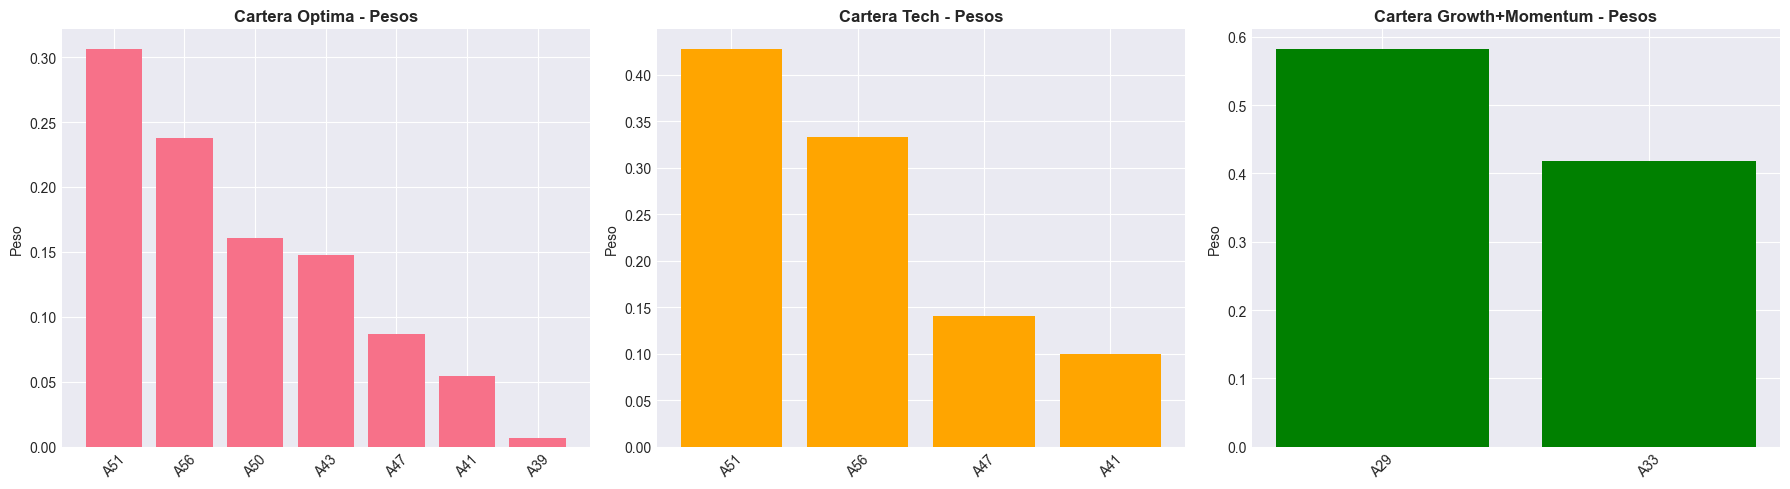

[OK] Grafico guardado: carteras_pesos.png


In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

pesos_c1_plot = [p for _, p in activos_con_peso]
labels_c1 = [f"A{a}" for a, _ in activos_con_peso]
axes[0].bar(range(len(pesos_c1_plot)), pesos_c1_plot)
axes[0].set_title('Cartera Optima - Pesos', fontweight='bold')
axes[0].set_xticks(range(len(labels_c1)))
axes[0].set_xticklabels(labels_c1, rotation=45)
axes[0].set_ylabel('Peso')

pesos_c2_plot = [p for _, p in activos_con_peso_2]
labels_c2 = [f"A{a}" for a, _ in activos_con_peso_2]
axes[1].bar(range(len(pesos_c2_plot)), pesos_c2_plot, color='orange')
axes[1].set_title('Cartera Tech - Pesos', fontweight='bold')
axes[1].set_xticks(range(len(labels_c2)))
axes[1].set_xticklabels(labels_c2, rotation=45)
axes[1].set_ylabel('Peso')

pesos_c3_plot = [p for _, p in activos_con_peso_3]
labels_c3 = [f"A{a}" for a, _ in activos_con_peso_3]
axes[2].bar(range(len(pesos_c3_plot)), pesos_c3_plot, color='green')
axes[2].set_title('Cartera Growth+Momentum - Pesos', fontweight='bold')
axes[2].set_xticks(range(len(labels_c3)))
axes[2].set_xticklabels(labels_c3, rotation=45)
axes[2].set_ylabel('Peso')

plt.tight_layout()
plt.savefig('carteras_pesos.png', dpi=300, bbox_inches='tight')
plt.show()

print('[OK] Grafico guardado: carteras_pesos.png')

In [45]:
df_export = pd.DataFrame({
    'Activo': range(1, 61),
    'Cartera_Optima_Mercado': pesos_redondeados_c1,
    'Cartera_Agresiva_Tech': pesos_redondeados_c2,
    'Cartera_Growth_Momentum': pesos_redondeados_c3
})
df_export.to_csv('../vectores_pesos_carteras.csv', index=False)

print('[OK] Vectores de pesos exportados: vectores_pesos_carteras.csv')
print('\nVector completo (todos los 60 activos):')
print(df_export.to_string(index=False))

[OK] Vectores de pesos exportados: vectores_pesos_carteras.csv

Ejemplo del vector (primeros 10 activos):
   Cartera_Optima_Mercado  Cartera_Agresiva_Tech  Cartera_Growth_Momentum
0                     0.0                    0.0                      0.0
1                     0.0                    0.0                      0.0
2                     0.0                    0.0                      0.0
3                     0.0                    0.0                      0.0
4                     0.0                    0.0                      0.0
5                     0.0                    0.0                      0.0
6                     0.0                    0.0                      0.0
7                     0.0                    0.0                      0.0
8                     0.0                    0.0                      0.0
9                     0.0                    0.0                      0.0
...

Últimos 5 activos:
    Cartera_Optima_Mercado  Cartera_Agresiva_Tech  Carte